In [93]:
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()

In [94]:
import pandas as pd

# since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

#view the iris dataframe
# print(iris_df['class'][51])

In [213]:
import numpy as np
import matplotlib.pyplot as plt


# Define our neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Hidden layer initialization
        np.random.seed(42)
        self.W1 = np.random.rand(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))

        # Output layer initialization
        self.W2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)

    def softmax(self, x):
        """Compute softmax values for each sets of scores in x."""
        # Subtract the max value from each score to prevent overflow in exp
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / e_x.sum(axis=-1, keepdims=True)

    def forward(self, x):
        # calculate the activations in the hidden layer
        self.Z1 = np.dot(x, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)

        # calculate activations for the output layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        y_hat = self.softmax(self.Z2)
        return y_hat

    def compute_loss(self, y_hat, y):
        # Assuming y is one-hot encoded
        m = y.shape[0]
        loss = -np.sum(y * np.log(y_hat + 1e-9)) / m  # adding epsilon to prevent log(0)
        return loss

    def backward(self, X, y, y_hat, learning_rate, iteration_number):
        # Error at the output layer
        # m is the number of examples in the batch. This is used to average the gradients over the batch.
        m = y.shape[0]
        # y_hat is the predicted labels 
        # derivative of cross-entropy wrt logits (where logits are the scores pre-softmax):
        error = y_hat - y  # For softmax with cross-entropy, this is the derivative
        # if iteration_number == 999: 
            # print("y", y[10:20])
            # print("y_hat", y_hat[10:20])
            # print("error.shape", error.shape)
            # print("self.A1.shape", self.A1.shape)
            # print("self.A1.T.shape", self.A1.T.shape)
            # print("m", m)
            # print("self.W1.shape", self.W1.shape)
            # print("self.b1.shape", self.b1.shape)
            # print("self.W2.shape", self.W2.shape)
            # print("self.b2.shape", self.b2.shape)
        dW2 = (1 / m) * np.dot(self.A1.T, error)
        db2 = (1 / m) * np.sum(error, axis=0, keepdims=True)

        # Error at the hidden layer
        error_hidden_layer = np.dot(error, self.W2.T) * self.relu_derivative(self.Z1)
        dW1 = (1 / m) * np.dot(X.T, error_hidden_layer)
        db1 = (1 / m) * np.sum(error_hidden_layer, axis=0, keepdims=True)

        # Update parameters
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, learning_rate=0.01, n_iterations=20000):
        losses = []  # Initialize a list to store loss values
        for i in range(n_iterations):
            y_hat = self.forward(X)
            loss = self.compute_loss(y_hat, y)
            self.backward(X, y, y_hat, learning_rate, i)
            losses.append(loss)  # Append the current loss to the list
            # if i % 100 == 0:
                # print(f"Iteration {i}: Loss {loss}")
        plt.figure(figsize=(10, 6))
        plt.plot(range(n_iterations), losses, '-o', label='Cost')
        plt.title('Cost vs. Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.legend()
        plt.grid(True)
        plt.show()

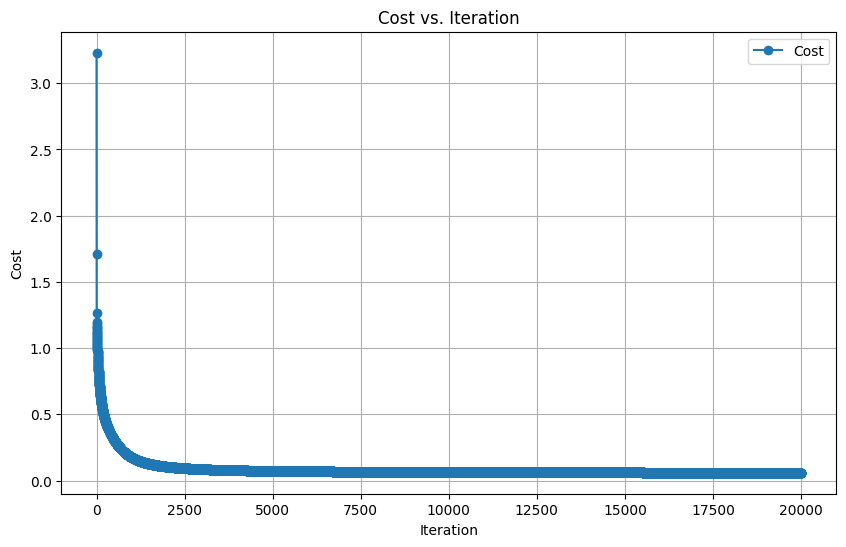

random_state =  42
X_train [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.

In [214]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# create a new instance of a neural network
nn = NeuralNetwork(input_size = 4, hidden_size = 8, output_size = 3)

X = iris_df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']].values
#print(X)

# y_hat = nn.forward(X)

# print(y_hat)
# print(y_hat[:5])
# print(y_hat[145:])

Y = iris_df['class'].values.reshape(-1, 1)  # Reshape for consistency

random_state = 42

# Split the data first
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=random_state)

# Then, encode Y_train and Y_val separately to ensure matching between predictions and true labels
encoder = OneHotEncoder()
Y_train_one_hot = encoder.fit_transform(Y_train).toarray()  # Fit and transform Y_train
Y_val_one_hot = encoder.transform(Y_val).toarray()  # Transform Y_val based on the same encoding

# Train your model on the training data
nn.train(X_train, Y_train_one_hot)

# Validate your model
y_hat_val = nn.forward(X_val)
predictions = np.argmax(y_hat_val, axis=1)
true_labels = np.argmax(Y_val_one_hot, axis=1)  # Use only the validation part of Y_one_hot

# Calculate and print the accuracy for the validation set
accuracy = np.mean(predictions == true_labels)
print("random_state = ", random_state)

print("X_train", X_train)

# def count_values(matrix):
#     count = {0: 0, 1: 0, 2: 0}
#     for row in matrix:
#         if row[0] in count:
#             count[row[0]] += 1
#     return count


# result = count_values(Y_val)
# print("counts in validation data (Y_val) = ", result)
print(f"Validation Accuracy: {accuracy}")





## 